In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist
import tensorflow.keras as tk

In [2]:
%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
display(x_train.shape,x_test.shape)

(60000, 28, 28)

(10000, 28, 28)

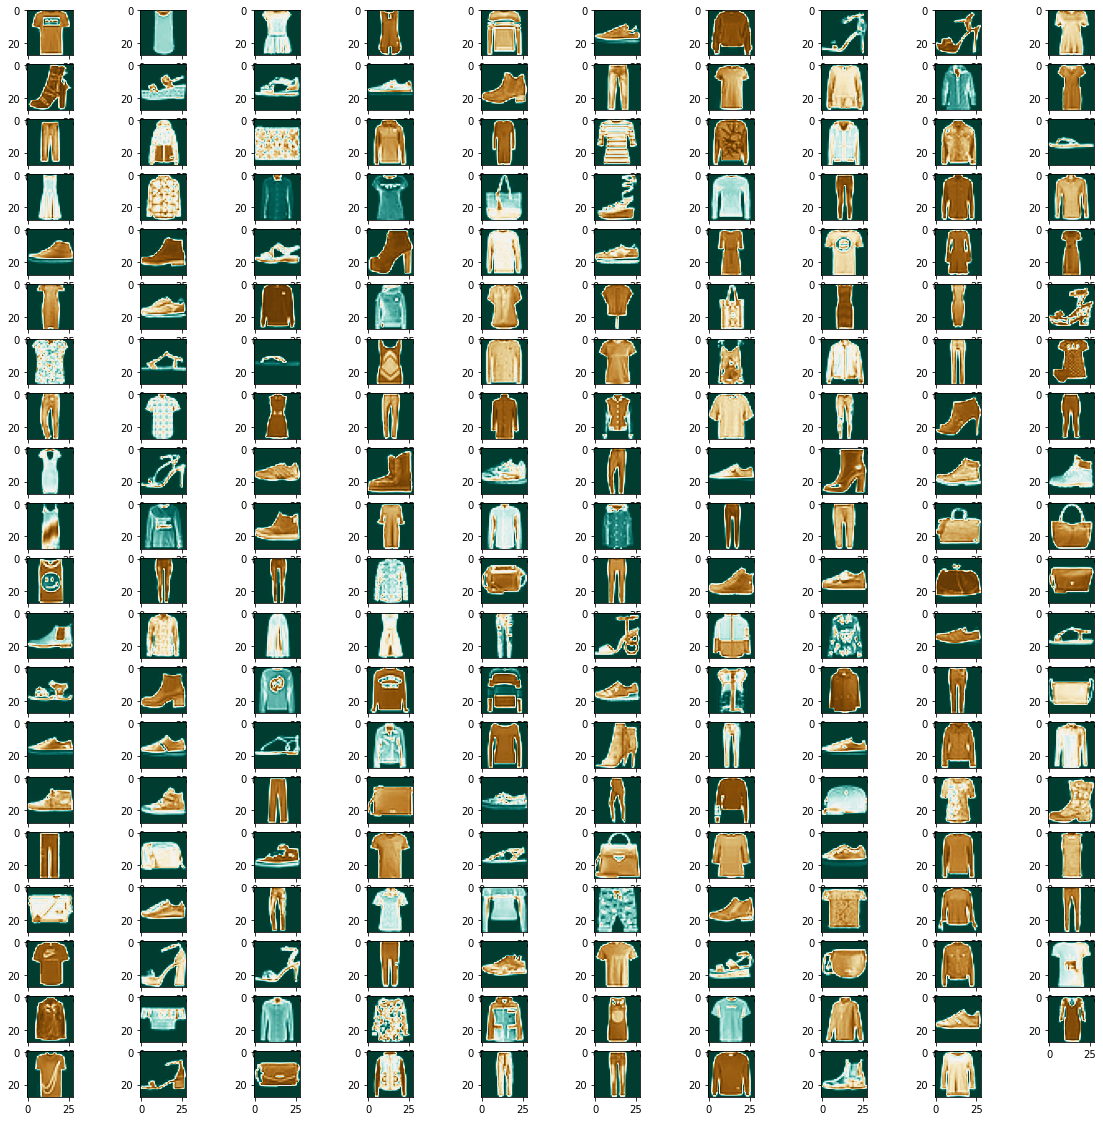

In [5]:
figure=plt.figure(figsize=(20,20))
for i in range(1,200):
  plt.subplot(20,10,i)
  plt.imshow(x_train[i],cmap=plt.get_cmap('BrBG_r'))
plt.show()

In [6]:
cnn_model = tk.Sequential()
 
cnn_model.add(tk.layers.Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
 
    # Max pooling will reduce the
    # size with a kernal size of 2x2
cnn_model.add(tk.layers.MaxPooling2D(pool_size= (2,2)))

    # Once the convolutional and pooling
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
cnn_model.add(tk.layers.Flatten())
    
cnn_model.add(tk.layers.Dense(32,activation = 'relu'))
cnn_model.add(tk.layers.Dense(10,activation = 'softmax'))   

In [7]:
cnn_model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
cnn_model.fit(x=x_train,y=y_train,batch_size =512,epochs = 50,verbose = 1,validation_data = (x_test,y_test))

Epoch 1/50
118/118 [==============================] - 4s 16ms/step - loss: 2.5946 - accuracy: 0.5060 - val_loss: 1.0046 - val_accuracy: 0.6364
Epoch 2/50
118/118 [==============================] - 2s 14ms/step - loss: 0.8461 - accuracy: 0.6833 - val_loss: 0.7642 - val_accuracy: 0.7051
Epoch 3/50
118/118 [==============================] - 2s 14ms/step - loss: 0.7064 - accuracy: 0.7249 - val_loss: 0.7105 - val_accuracy: 0.7291
Epoch 4/50
118/118 [==============================] - 2s 14ms/step - loss: 0.6322 - accuracy: 0.7586 - val_loss: 0.6449 - val_accuracy: 0.7653
Epoch 5/50
118/118 [==============================] - 2s 14ms/step - loss: 0.5833 - accuracy: 0.7766 - val_loss: 0.5994 - val_accuracy: 0.7711
Epoch 6/50
118/118 [==============================] - 2s 14ms/step - loss: 0.5431 - accuracy: 0.7915 - val_loss: 0.5770 - val_accuracy: 0.7879
Epoch 7/50
118/118 [==============================] - 2s 14ms/step - loss: 0.5114 - accuracy: 0.8054 - val_loss: 0.5467 - val_accuracy: 0.8002

In [9]:
evaluation = cnn_model.evaluate(x_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.8454
Test Accuracy : 0.845


In [10]:
predicted_classes = np.argmax(cnn_model.predict(x_test),axis=-1)

313/313 [==============================] - 0s 1ms/step


In [11]:
predicted_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

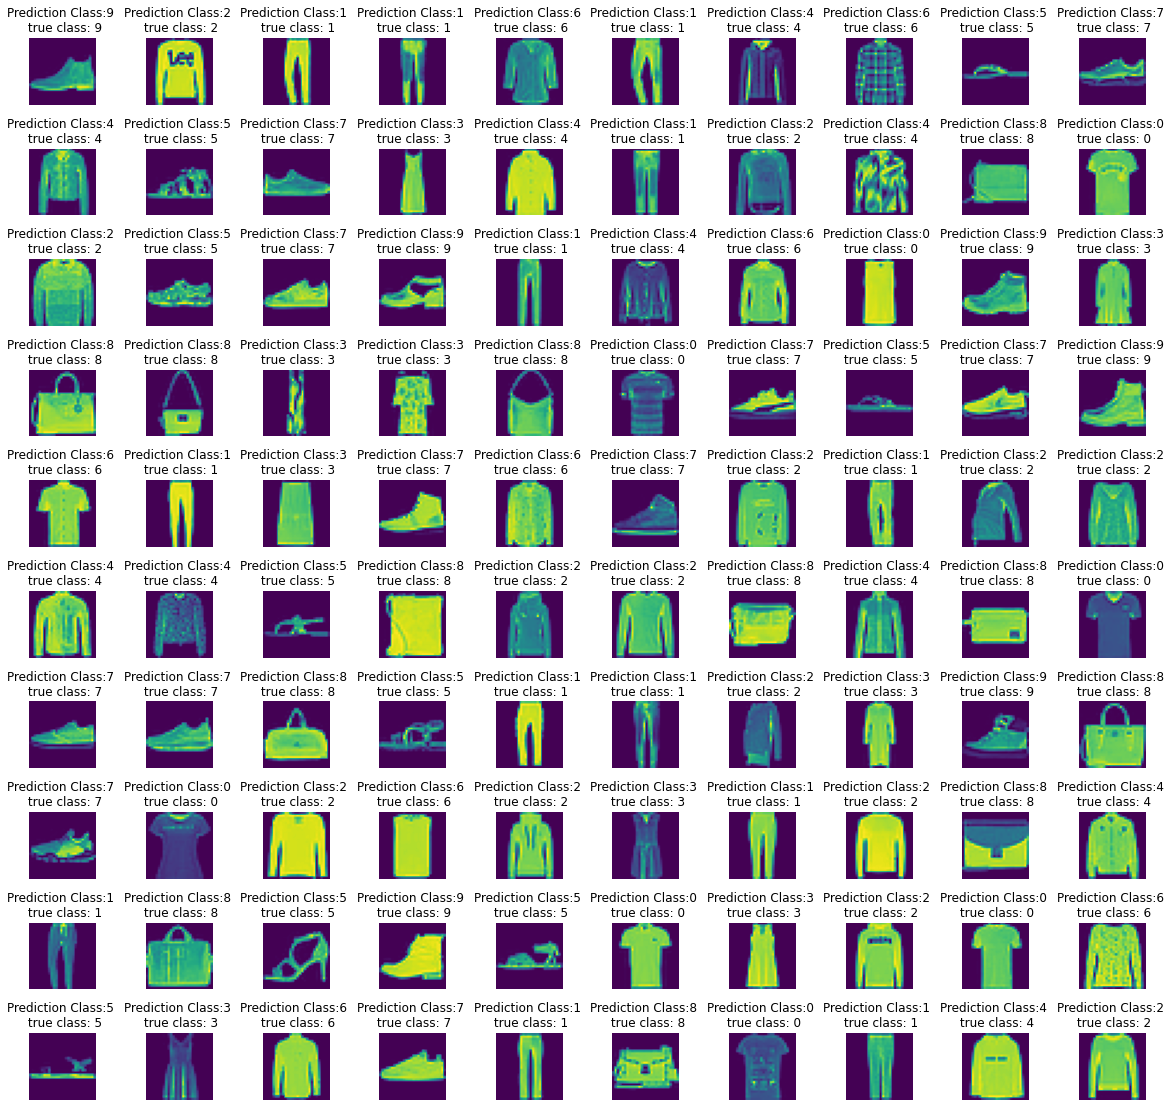

In [12]:
L = 10
W = 10
fig,axes = plt.subplots(L,W,figsize = (20,20))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.75)  

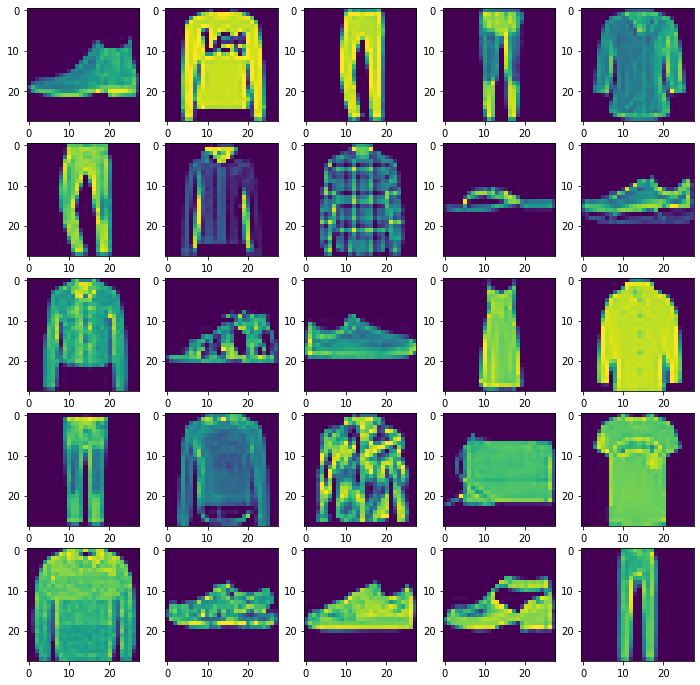

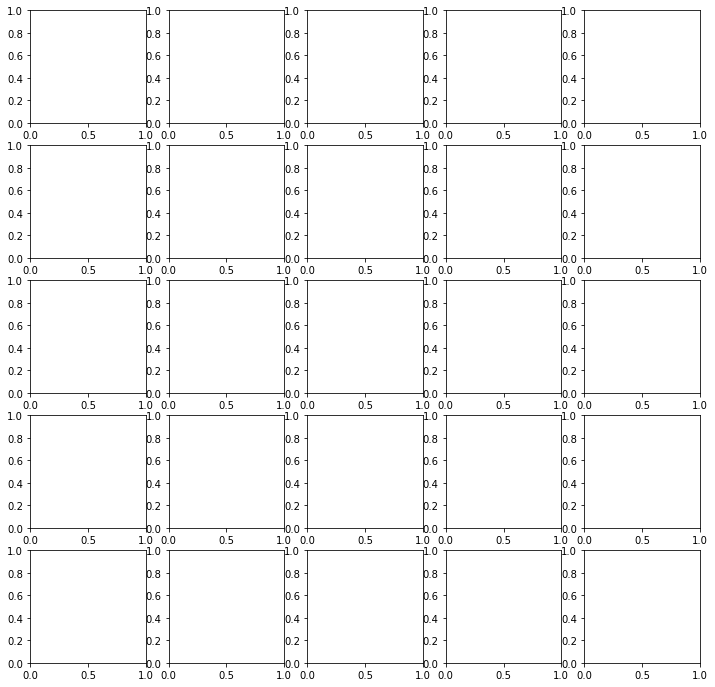